# Exploratory Data Analysis (EDA) of the BRURIIoT dataset

**Authors:** 
* Edllyn de Jesus Silva
* Evgeni Korsakov Cruz
* Victor Yukio Shirasuna

BRURIIoT dataset available at: https://ieee-dataport.org/documents/bruriiot-dataset-network-anomaly-detection-iiot-enhanced-feature-engineering-approach

## 1. Importing libraries

In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm

%matplotlib inline

SEED = 2025

## 2. Loading dataset

In [ ]:
df = dd.read_csv('BRUIIoT.csv')
df.head()

,frame.time__calculate_duration,ip.src_host__nunique,ip.dst_host__nunique,arp.dst.proto_ipv4__nunique,arp.opcode__min,arp.opcode__max,arp.opcode__sum,arp.opcode__mean,arp.opcode__min_max_diff,arp.opcode__min_max_ratio,...,mqtt.topic_len__max,mqtt.topic_len__sum,mqtt.topic_len__mean,mqtt.topic_len__min_max_diff,mqtt.topic_len__min_max_ratio,mqtt.topic_len__min_max_product,mqtt.topic_len__mean_square,is_attack__most_frequent,attack_label_enc__most_frequent,attack_label__most_frequent
0,0.000174,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,ddos_smurf
1,0.010008,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,ddos_smurf
2,0.001801,13,10,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,ddos_syn_flood
3,0.002471,1,20,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5,ddos_syn_flood
4,0.005350,3,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,ddos_http_flood


In [ ]:
df.info()

<class 'dask_expr.DataFrame'>
Columns: 267 entries, frame.time__calculate_duration to attack_label__most_frequent
dtypes: float64(162), int64(104), string(1)

In [ ]:
df.columns

Index(['frame.time__calculate_duration', 'ip.src_host__nunique',
       'ip.dst_host__nunique', 'arp.dst.proto_ipv4__nunique',
       'arp.opcode__min', 'arp.opcode__max', 'arp.opcode__sum',
       'arp.opcode__mean', 'arp.opcode__min_max_diff',
       'arp.opcode__min_max_ratio',
       ...
       'mqtt.topic_len__max', 'mqtt.topic_len__sum', 'mqtt.topic_len__mean',
       'mqtt.topic_len__min_max_diff', 'mqtt.topic_len__min_max_ratio',
       'mqtt.topic_len__min_max_product', 'mqtt.topic_len__mean_square',
       'is_attack__most_frequent', 'attack_label_enc__most_frequent',
       'attack_label__most_frequent'],
      dtype='object', length=267)

In [ ]:
targets_cols = ['attack_label__most_frequent', 'attack_label_enc__most_frequent', 'is_attack__most_frequent']

In [ ]:
modules = list(set(map(lambda x: x.split('.')[0], df.columns)))  # get protocols
modules = [m for m in modules if m not in targets_cols]  # remove target columns
modules

['icmp', 'ip', 'udp', 'dns', 'http', 'arp', 'mqtt', 'tcp', 'frame']

In [ ]:
total_rows = len(df)
total_rows

2776422

## 3. Target distributions

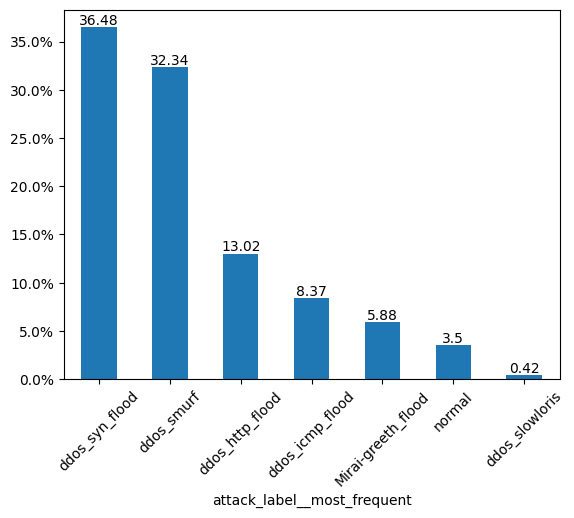

In [ ]:
ax = df['attack_label__most_frequent'].compute().value_counts(normalize=True).apply(lambda x: round(x*100, 2)).plot.bar(rot=45)

# add bar's labels
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

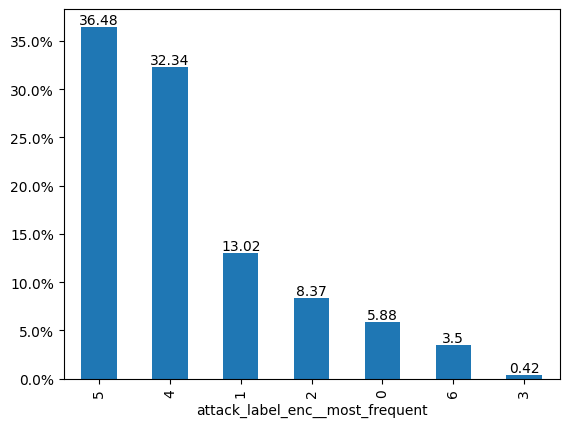

In [ ]:
ax = df['attack_label_enc__most_frequent'].compute().value_counts(normalize=True).apply(lambda x: round(x*100, 2)).plot.bar()

# add bar's labels
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

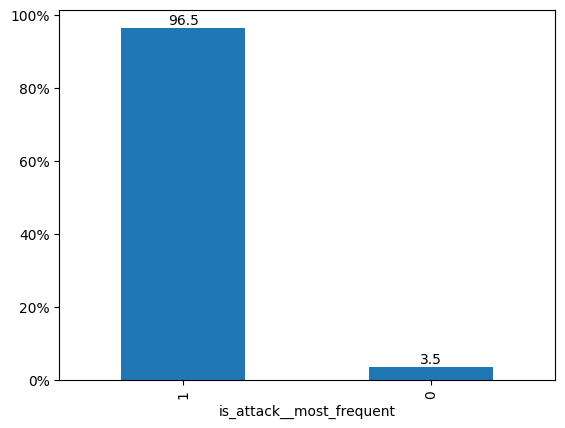

In [ ]:
ax = df['is_attack__most_frequent'].compute().value_counts(normalize=True).apply(lambda x: round(x*100, 2)).plot.bar()

# add bar's labels
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## 4. Sampling data

- Confidence Level: 99%
- Margin of Error: 0.5%
- Population Size: 2,776,422
- Sample size: 65,006

In [ ]:
# sampling settings
sample_size = 65006
dask_frac_factor_error = 1

# sampling
df_sample = df.sample(frac=(sample_size+dask_frac_factor_error)/total_rows, random_state=SEED).compute()
df_sample.shape

(65006, 267)

### 4.1 Checking target distributions

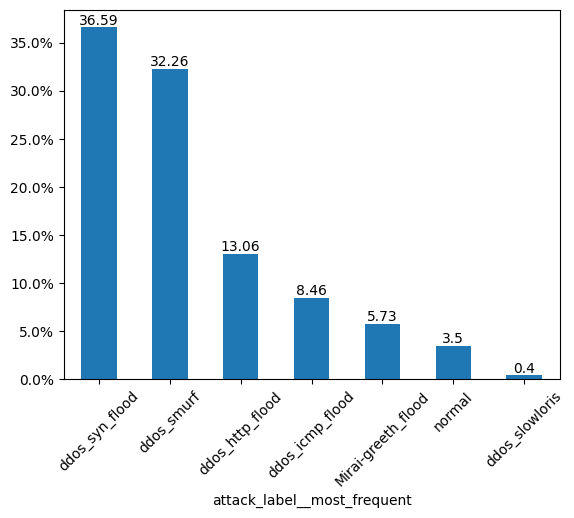

In [ ]:
ax = df_sample['attack_label__most_frequent'].value_counts(normalize=True).apply(lambda x: round(x*100, 2)).plot.bar(rot=45)

# add bar's labels
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

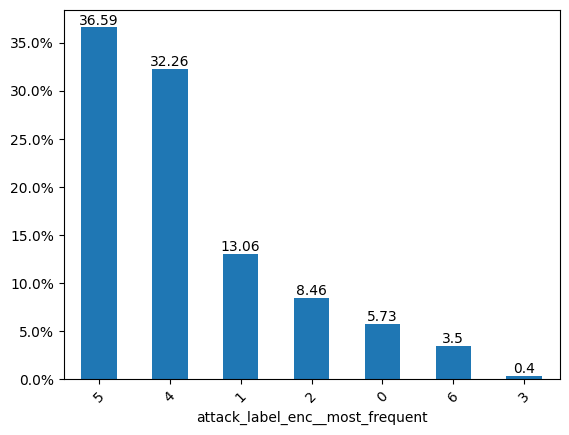

In [ ]:
ax = df_sample['attack_label_enc__most_frequent'].value_counts(normalize=True).apply(lambda x: round(x*100, 2)).plot.bar(rot=45)

# add bar's labels
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

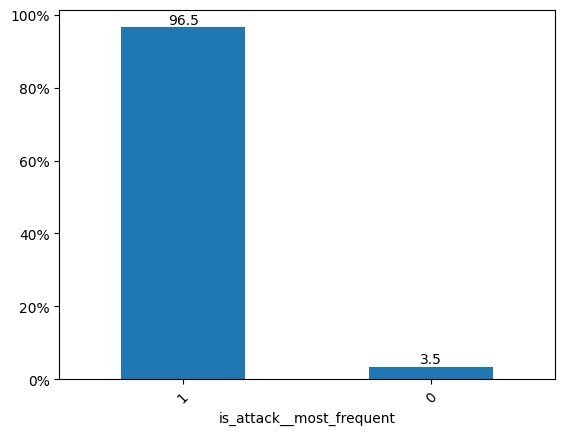

In [ ]:
ax = df_sample['is_attack__most_frequent'].value_counts(normalize=True).apply(lambda x: round(x*100, 2)).plot.bar(rot=45)

# add bar's labels
for container in ax.containers:
    ax.bar_label(container)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### 4.2 Statistics per protocol

In [ ]:
def filter_module(columns, module):
    match_module = map(lambda x: x if module in x else None, columns)  # match module columns else None
    clean_module = filter(lambda x: x is not None, match_module)  # remove None values
    return list(clean_module)

In [ ]:
for m in modules:
    print(f'**Processing module {m}...**')

    # get module's columns
    cols = filter_module(df_sample.columns, m)
    print(f'Columns length: {len(cols)}, columns:', cols)
    print('')

**Processing module icmp...**
Columns length: 16, columns: ['icmp.checksum__min', 'icmp.checksum__max', 'icmp.checksum__sum', 'icmp.checksum__mean', 'icmp.checksum__min_max_diff', 'icmp.checksum__min_max_ratio', 'icmp.checksum__min_max_product', 'icmp.checksum__mean_square', 'icmp.seq_le__min', 'icmp.seq_le__max', 'icmp.seq_le__sum', 'icmp.seq_le__mean', 'icmp.seq_le__min_max_diff', 'icmp.seq_le__min_max_ratio', 'icmp.seq_le__min_max_product', 'icmp.seq_le__mean_square']

**Processing module ip...**
Columns length: 4, columns: ['ip.src_host__nunique', 'ip.dst_host__nunique', 'arp.dst.proto_ipv4__nunique', 'arp.src.proto_ipv4__nunique']

**Processing module udp...**
Columns length: 11, columns: ['udp.port__nunique', 'udp.stream__nunique', 'udp.time_delta__min', 'udp.time_delta__max', 'udp.time_delta__sum', 'udp.time_delta__mean', 'udp.time_delta__calculate_duration', 'udp.time_delta__min_max_diff', 'udp.time_delta__min_max_ratio', 'udp.time_delta__min_max_product', 'udp.time_delta__mean

In [ ]:
for m in modules:
    print(f'Processing module {m}...')

    # get module's columns
    cols = filter_module(df_sample.columns, m) + targets_cols
    df_sample_module = df_sample[cols].reset_index(drop=True)

    # remove target columns
    df_sample_module_features = df_sample_module.drop(columns=targets_cols)

    display(df_sample_module_features.describe().T)

Processing module icmp...


,count,mean,std,min,25%,50%,75%,max
icmp.checksum__min,65006.0,6.474953e+03,1.228444e+04,0.0,0.0,0.000000e+00,6.961500e+03,6.217500e+04
icmp.checksum__max,65006.0,2.670351e+04,2.778156e+04,0.0,0.0,1.644150e+04,5.752700e+04,6.553400e+04
icmp.checksum__sum,65006.0,3.181234e+05,3.578485e+05,0.0,0.0,1.303420e+05,6.337745e+05,1.270498e+06
icmp.checksum__mean,65006.0,1.590617e+04,1.789243e+04,0.0,0.0,6.517100e+03,3.168872e+04,6.352490e+04
icmp.checksum__min_max_diff,65006.0,2.022855e+04,2.473079e+04,0.0,0.0,5.120000e+03,4.483475e+04,6.553400e+04
icmp.checksum__min_max_ratio,65006.0,4.261391e+03,1.502969e+04,0.0,0.0,1.137776e+00,8.144153e+00,6.553400e+04
icmp.checksum__min_max_product,65006.0,3.284568e+08,6.744919e+08,0.0,0.0,0.000000e+00,3.027292e+08,4.056732e+09
icmp.checksum__mean_square,65006.0,5.731403e+08,8.028617e+08,0.0,0.0,4.247259e+07,1.004175e+09,4.035413e+09
icmp.seq_le__min,65006.0,8.484351e+03,1.491549e+04,0.0,0.0,0.000000e+00,1.175750e+04,6.550500e+04
icmp.seq_le__max,65006.0,1.731075e+04,2.374116e+04,0.0,0.0,0.000000e+00,4.031350e+04,6.553500e+04


Processing module ip...


,count,mean,std,min,25%,50%,75%,max
ip.src_host__nunique,65006.0,4.391733,5.046855,1.0,1.0,2.0,5.0,20.0
ip.dst_host__nunique,65006.0,6.899086,7.113756,1.0,1.0,3.0,12.0,20.0
arp.dst.proto_ipv4__nunique,65006.0,1.007938,0.120117,1.0,1.0,1.0,1.0,8.0
arp.src.proto_ipv4__nunique,65006.0,1.007476,0.108295,1.0,1.0,1.0,1.0,6.0


Processing module udp...


,count,mean,std,min,25%,50%,75%,max
udp.port__nunique,65006.0,2.092499e+00,4.380707e+00,1.000000,1.0,1.0,1.0,2.000000e+01
udp.stream__nunique,65006.0,2.093453e+00,4.383173e+00,1.000000,1.0,1.0,1.0,2.000000e+01
udp.time_delta__min,65006.0,-2.298157e-06,5.841956e-04,-0.148948,0.0,0.0,0.0,0.000000e+00
udp.time_delta__max,65006.0,4.033486e-02,1.228672e+00,0.000000,0.0,0.0,0.0,1.862169e+02
udp.time_delta__sum,65006.0,7.977390e-02,3.686913e+00,-0.000092,0.0,0.0,0.0,5.586503e+02
udp.time_delta__mean,65006.0,3.988695e-03,1.843457e-01,-0.000005,0.0,0.0,0.0,2.793252e+01
udp.time_delta__calculate_duration,65006.0,3.819647e-11,1.216646e-09,0.000000,0.0,0.0,0.0,1.860000e-07
udp.time_delta__min_max_diff,65006.0,4.033716e-02,1.228672e+00,0.000000,0.0,0.0,0.0,1.862169e+02
udp.time_delta__min_max_ratio,65006.0,4.033539e-02,1.228690e+00,0.000000,0.0,0.0,0.0,1.862247e+02
udp.time_delta__min_max_product,65006.0,-4.729072e-07,9.222459e-05,-0.022172,0.0,0.0,0.0,0.000000e+00


Processing module dns...


,count,mean,std,min,25%,50%,75%,max
dns.qry.name__nunique,65006.0,1.013183,2.165274e-01,1.0,1.0,1.0,1.0,1.600000e+01
dns.qry.name.len__nunique,65006.0,1.012460,1.855443e-01,1.0,1.0,1.0,1.0,1.300000e+01
dns.qry.qu__min,65006.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
dns.qry.qu__max,65006.0,0.006184,2.873513e-01,0.0,0.0,0.0,0.0,2.300000e+01
dns.qry.qu__sum,65006.0,0.014353,9.484815e-01,0.0,0.0,0.0,0.0,1.580000e+02
dns.qry.qu__mean,65006.0,0.000718,4.742407e-02,0.0,0.0,0.0,0.0,7.900000e+00
dns.qry.qu__min_max_diff,65006.0,0.006184,2.873513e-01,0.0,0.0,0.0,0.0,2.300000e+01
dns.qry.qu__min_max_ratio,65006.0,0.006184,2.873513e-01,0.0,0.0,0.0,0.0,2.300000e+01
dns.qry.qu__min_max_product,65006.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
dns.qry.qu__mean_square,65006.0,0.002250,3.084612e-01,0.0,0.0,0.0,0.0,6.241000e+01


Processing module http...


,count,mean,std,min,25%,50%,75%,max
http.file_data__nunique,65006.0,1.114236,0.663389,1.0,1.0,1.0,1.0,10.0000
http.content_length__min,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000
http.content_length__max,65006.0,26.225272,234.694439,0.0,0.0,0.0,0.0,10386.0000
http.content_length__sum,65006.0,51.880596,454.247046,0.0,0.0,0.0,0.0,10423.0000
http.content_length__mean,65006.0,2.594030,22.712352,0.0,0.0,0.0,0.0,521.1500
http.content_length__min_max_diff,65006.0,26.225272,234.694439,0.0,0.0,0.0,0.0,10386.0000
http.content_length__min_max_ratio,65006.0,26.225272,234.694439,0.0,0.0,0.0,0.0,10386.0000
http.content_length__min_max_product,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000
http.content_length__mean_square,65006.0,522.572002,6382.873015,0.0,0.0,0.0,0.0,271597.3225
http.request.uri.query__nunique,65006.0,1.095376,0.575460,1.0,1.0,1.0,1.0,9.0000


Processing module arp...


,count,mean,std,min,25%,50%,75%,max
arp.dst.proto_ipv4__nunique,65006.0,1.007938,0.120117,1.0,1.0,1.0,1.0,8.00
arp.opcode__min,65006.0,0.000015,0.003922,0.0,0.0,0.0,0.0,1.00
arp.opcode__max,65006.0,0.007738,0.107062,0.0,0.0,0.0,0.0,2.00
arp.opcode__sum,65006.0,0.010907,0.210970,0.0,0.0,0.0,0.0,28.00
arp.opcode__mean,65006.0,0.000545,0.010549,0.0,0.0,0.0,0.0,1.40
arp.opcode__min_max_diff,65006.0,0.007722,0.106848,0.0,0.0,0.0,0.0,2.00
arp.opcode__min_max_ratio,65006.0,0.007722,0.106848,0.0,0.0,0.0,0.0,2.00
arp.opcode__min_max_product,65006.0,0.000031,0.007844,0.0,0.0,0.0,0.0,2.00
arp.opcode__mean_square,65006.0,0.000112,0.008629,0.0,0.0,0.0,0.0,1.96
arp.hw.size__min,65006.0,0.000092,0.023533,0.0,0.0,0.0,0.0,6.00


Processing module mqtt...


,count,mean,std,min,25%,50%,75%,max
mqtt.conflag.cleansess__min,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflag.cleansess__max,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflag.cleansess__sum,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflag.cleansess__mean,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflag.cleansess__min_max_diff,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflag.cleansess__min_max_ratio,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflag.cleansess__min_max_product,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflag.cleansess__mean_square,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflags__min,65006.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
mqtt.conflags__max,65006.0,3.211150,24.751990,0.0,0.0,0.0,0.0,194.00


Processing module tcp...


,count,mean,std,min,25%,50%,75%,max
tcp.ack__min,65006.0,1.948067e+06,1.931270e+07,0.0,0.0,0.0,1.000000e+00,6.402315e+08
tcp.ack__max,65006.0,5.078186e+08,8.573097e+08,0.0,0.0,0.0,1.451207e+09,4.294966e+09
tcp.ack__sum,65006.0,3.041179e+09,5.753636e+09,0.0,0.0,0.0,3.196331e+09,3.122900e+10
tcp.ack__mean,65006.0,1.520590e+08,2.876818e+08,0.0,0.0,0.0,1.598166e+08,1.561450e+09
tcp.ack__min_max_diff,65006.0,5.058705e+08,8.540171e+08,0.0,0.0,0.0,1.449464e+09,4.294966e+09
...,...,...,...,...,...,...,...,...
tcp.seq__min_max_diff,65006.0,4.468589e+08,1.239638e+09,0.0,0.0,0.0,1.730000e+02,4.294967e+09
tcp.seq__min_max_ratio,65006.0,2.204408e+08,8.927555e+08,0.0,0.0,0.0,3.413635e+01,4.294967e+09
tcp.seq__min_max_product,65006.0,4.782130e+16,2.702763e+17,0.0,0.0,0.0,0.000000e+00,5.222164e+18
tcp.seq__mean_square,65006.0,3.645318e+17,1.223396e+18,0.0,0.0,0.0,6.656400e+02,1.038140e+19


Processing module frame...


,count,mean,std,min,25%,50%,75%,max
frame.time__calculate_duration,65006.0,0.25804,18.332599,0.000002,0.000798,0.001629,0.006062,2549.582064


### 4.3 Dimension reduction per protocol

Processing module icmp...


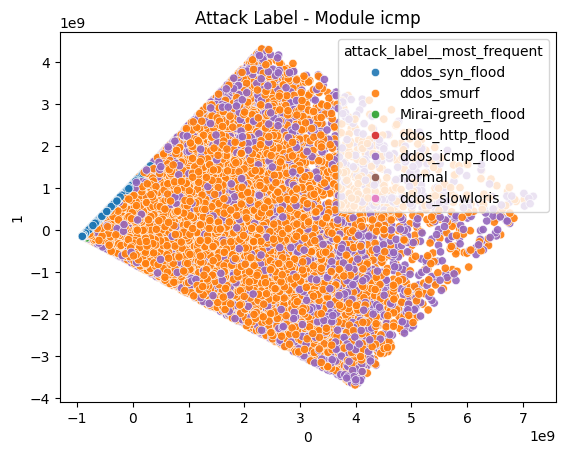

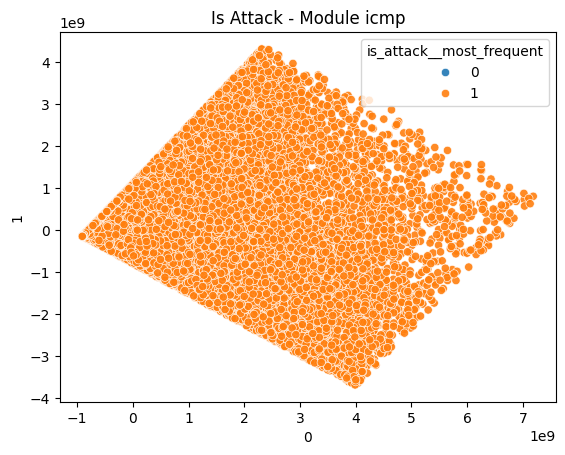

Processing module ip...


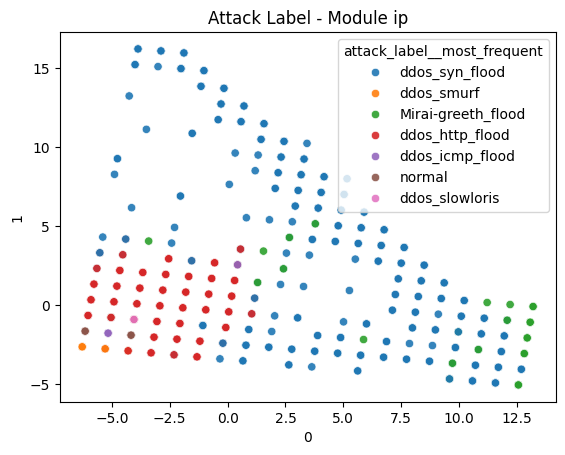

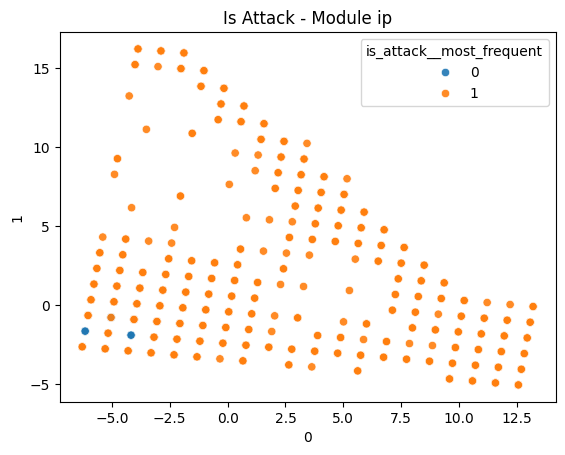

Processing module udp...


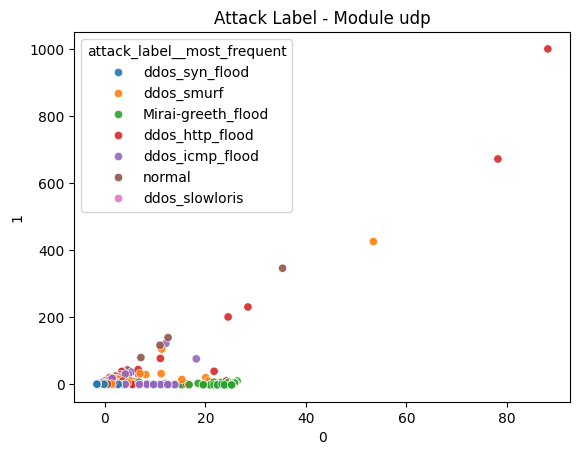

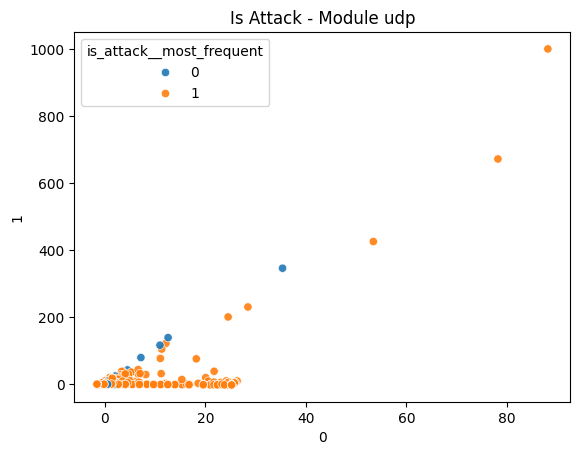

Processing module dns...


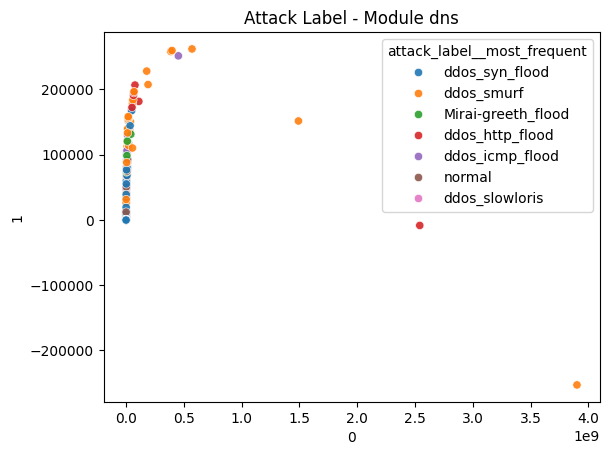

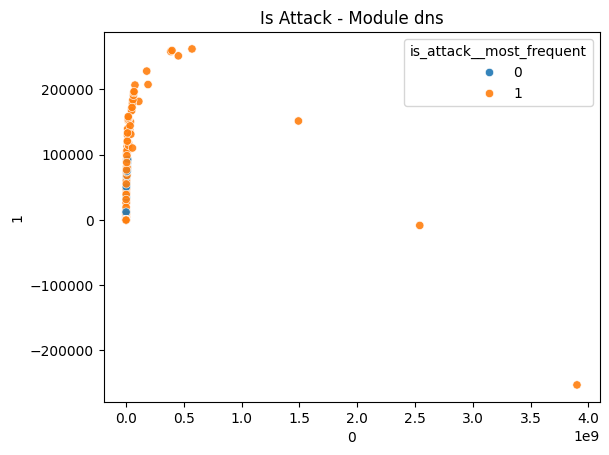

Processing module http...


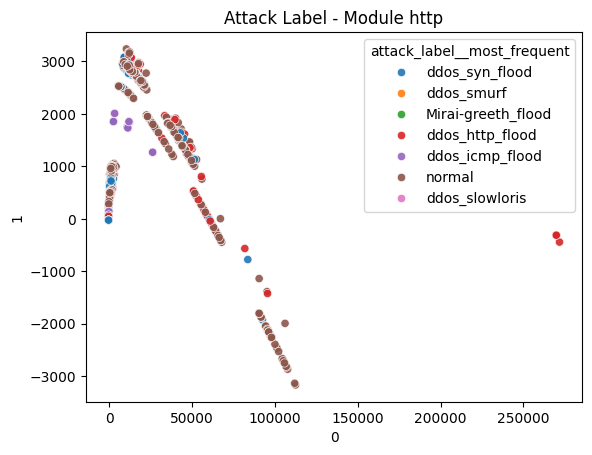

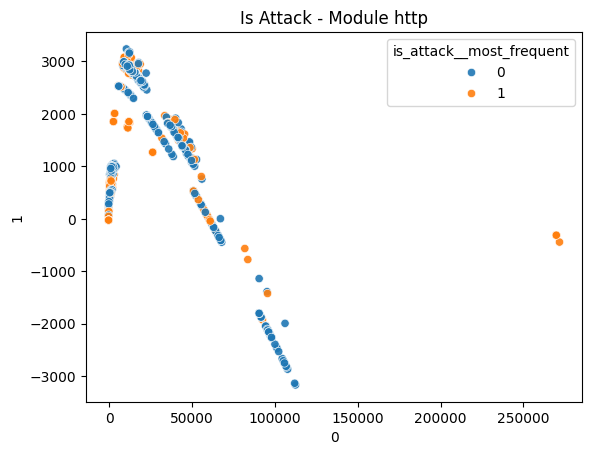

Processing module arp...


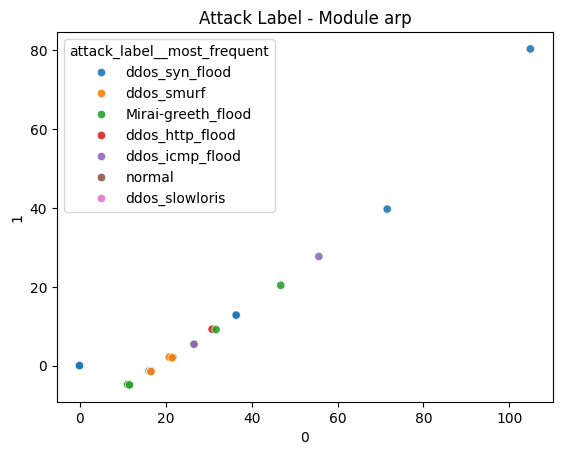

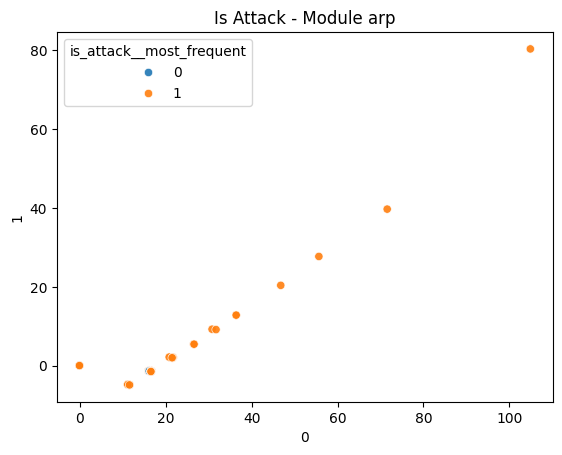

Processing module mqtt...


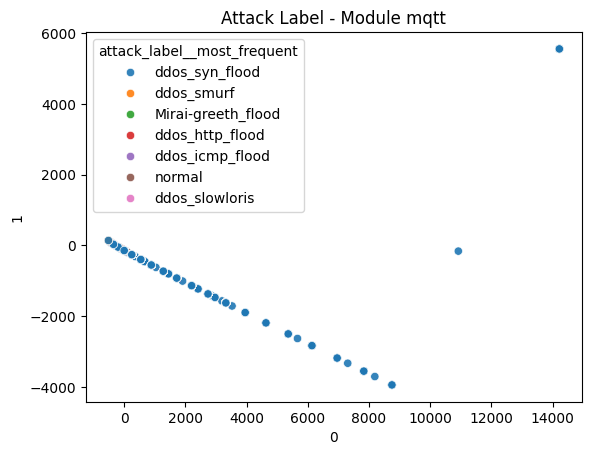

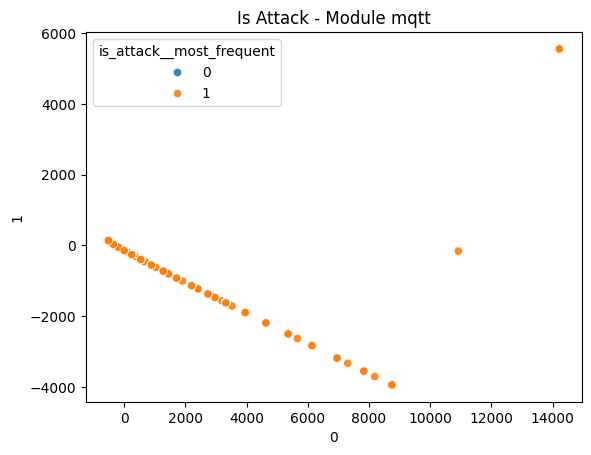

Processing module tcp...


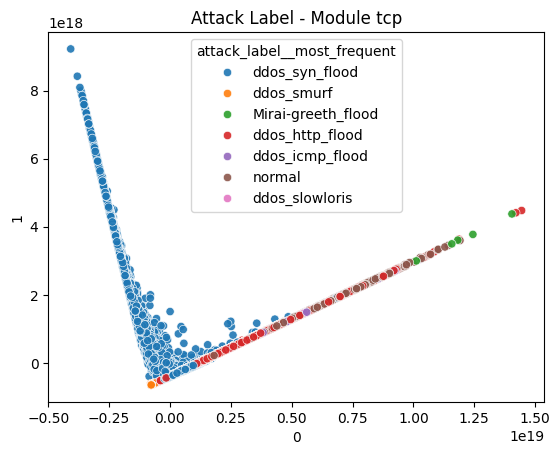

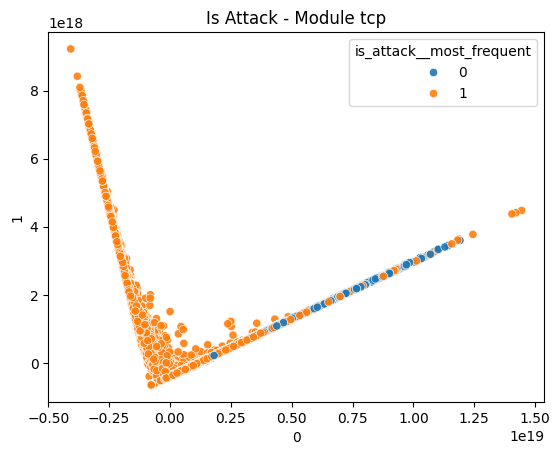

Processing module frame...


In [ ]:
for m in modules:
    print(f'Processing module {m}...')

    # get module's columns
    cols = filter_module(df_sample.columns, m) + targets_cols
    df_sample_module = df_sample[cols].reset_index(drop=True)

    # remove target columns
    df_sample_module_features = df_sample_module.drop(columns=targets_cols)

    # dimension reduction
    if df_sample_module_features.shape[1] > 2:
        sklearn_pca = PCA(n_components=2)
        X = sklearn_pca.fit_transform(df_sample_module_features)

        # concatenate features with targets
        df = pd.concat([pd.DataFrame(X), df_sample_module[targets_cols]], axis=1)

        # plots
        sns.scatterplot(df, x=0, y=1, hue='attack_label__most_frequent', alpha=0.9)
        plt.title(f'Attack Label - Module {m}')
        plt.show()

        sns.scatterplot(df, x=0, y=1, hue='is_attack__most_frequent', alpha=0.9)
        plt.title(f'Is Attack - Module {m}')
        plt.show()

### 4.4 Dimension reduction with all features

In [ ]:
df_sample_features = df_sample.drop(columns=targets_cols)
df_sample_features.head()

,frame.time__calculate_duration,ip.src_host__nunique,ip.dst_host__nunique,arp.dst.proto_ipv4__nunique,arp.opcode__min,arp.opcode__max,arp.opcode__sum,arp.opcode__mean,arp.opcode__min_max_diff,arp.opcode__min_max_ratio,...,mqtt.protoname__nunique,mqtt.topic__nunique,mqtt.topic_len__min,mqtt.topic_len__max,mqtt.topic_len__sum,mqtt.topic_len__mean,mqtt.topic_len__min_max_diff,mqtt.topic_len__min_max_ratio,mqtt.topic_len__min_max_product,mqtt.topic_len__mean_square
28766,0.002516,13,9,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31493,0.001521,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28782,0.019419,5,18,4,0.0,2.0,4.0,0.2,2.0,2.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17233,0.001809,12,10,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43554,0.009265,4,2,1,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


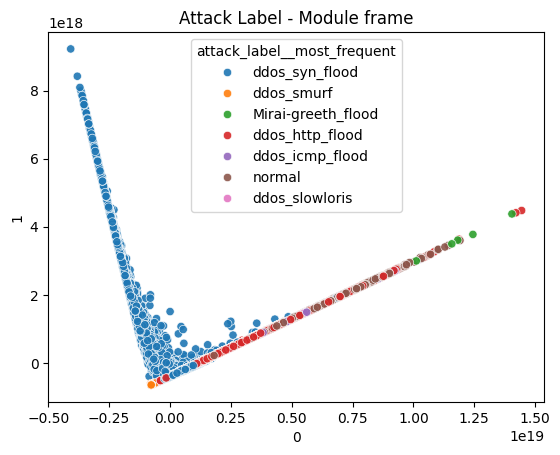

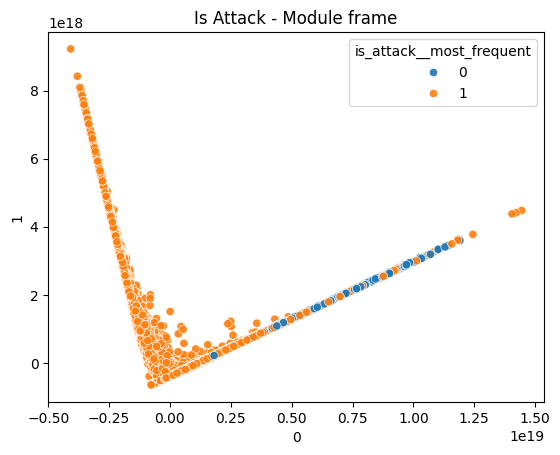

In [ ]:
# dimension reduction
sklearn_pca = PCA(n_components=2)
X = sklearn_pca.fit_transform(df_sample_features)

# concatenate features with targets
df = pd.concat([pd.DataFrame(X), df_sample[targets_cols].reset_index(drop=True)], axis=1)

# plots
sns.scatterplot(df, x=0, y=1, hue='attack_label__most_frequent', alpha=0.9)
plt.title(f'Attack Label - Module {m}')
plt.show()

sns.scatterplot(df, x=0, y=1, hue='is_attack__most_frequent', alpha=0.9)
plt.title(f'Is Attack - Module {m}')
plt.show()

### 4.5 Distribution of `frame.time__calculate_duration`

<Axes: ylabel='frame.time__calculate_duration'>

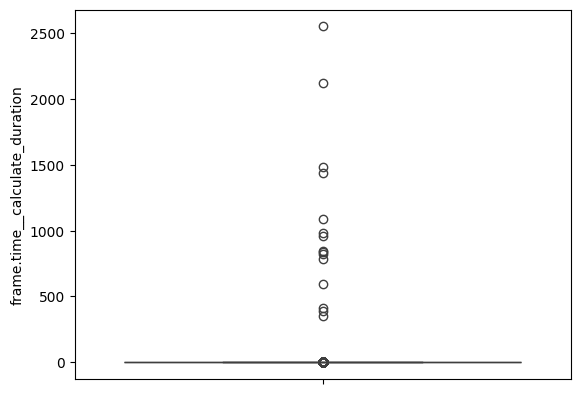

In [ ]:
sns.boxplot(df_sample, y='frame.time__calculate_duration')

<Axes: ylabel='frame.time__calculate_duration'>

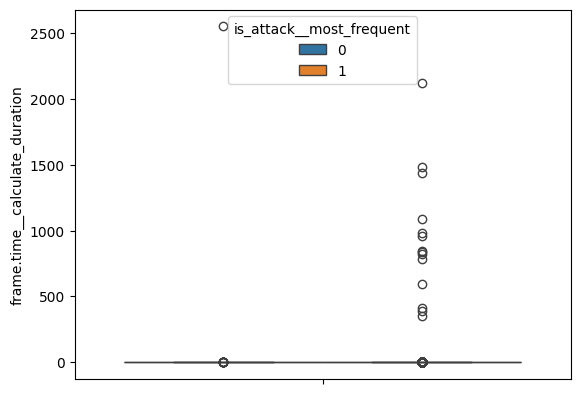

In [ ]:
sns.boxplot(df_sample, y='frame.time__calculate_duration', hue='is_attack__most_frequent')

<Axes: ylabel='frame.time__calculate_duration'>

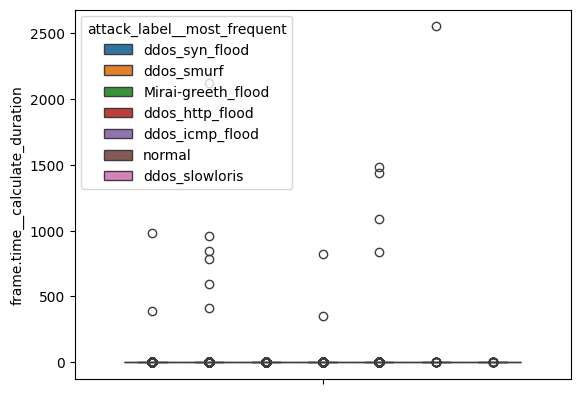

In [ ]:
sns.boxplot(df_sample, y='frame.time__calculate_duration', hue='attack_label__most_frequent')

<Axes: ylabel='Frequency'>

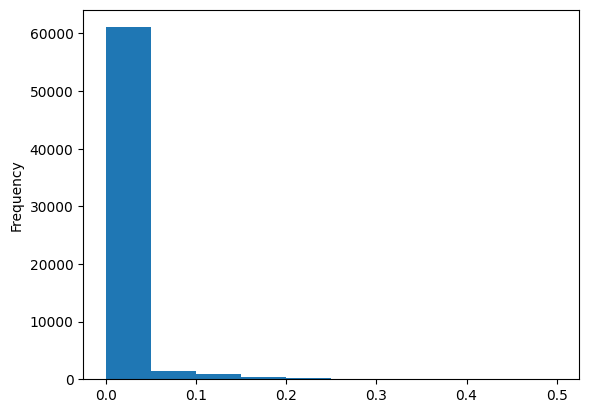

In [ ]:
df_sample.query('`frame.time__calculate_duration` < 0.5')['frame.time__calculate_duration'].plot.hist()

### 4.6 Correlation

<Axes: >

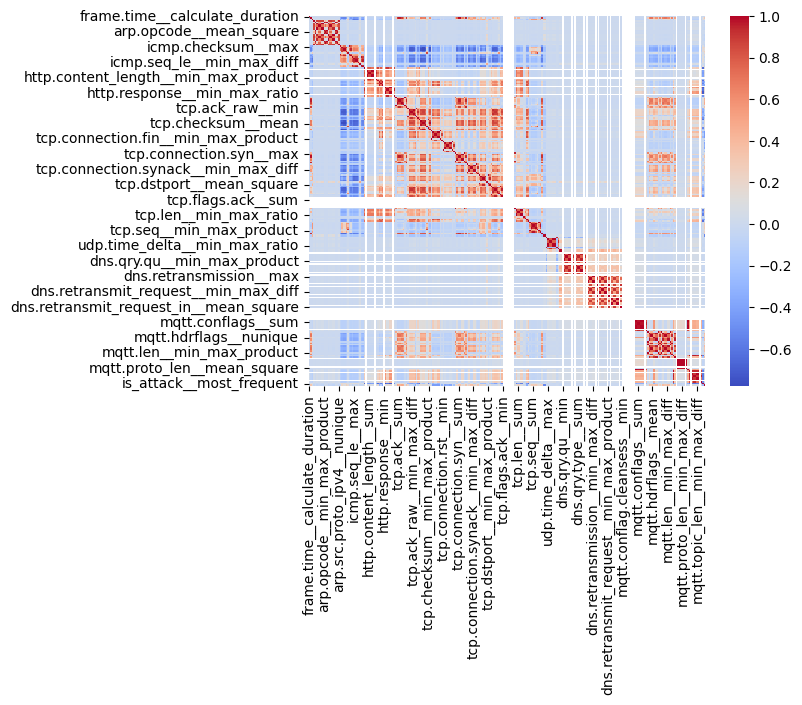

In [ ]:
corr = df_sample.drop(columns=['attack_label__most_frequent']).corr()
sns.heatmap(corr, cmap="coolwarm")

Processing module icmp...


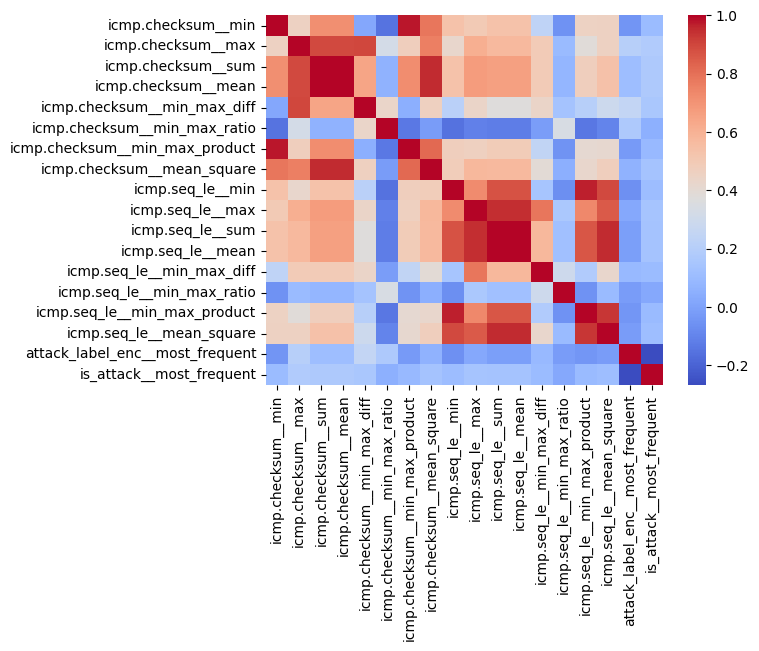

Processing module ip...


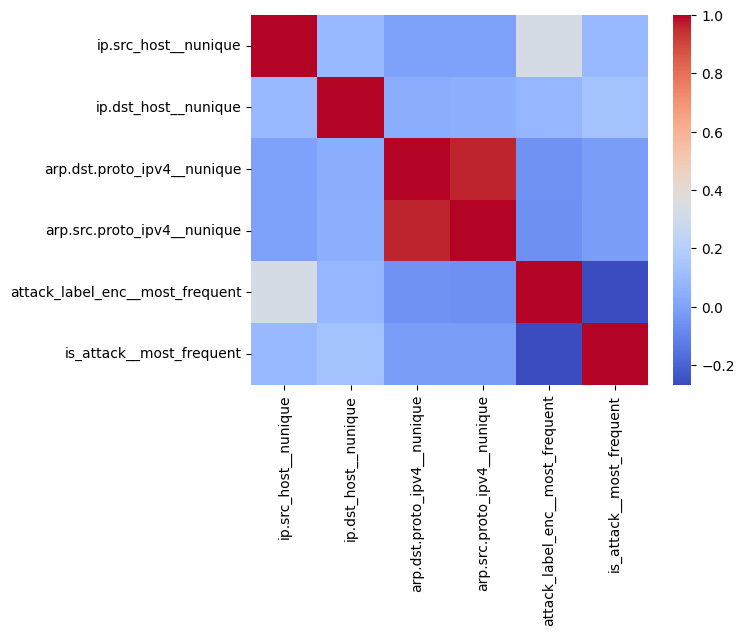

Processing module udp...


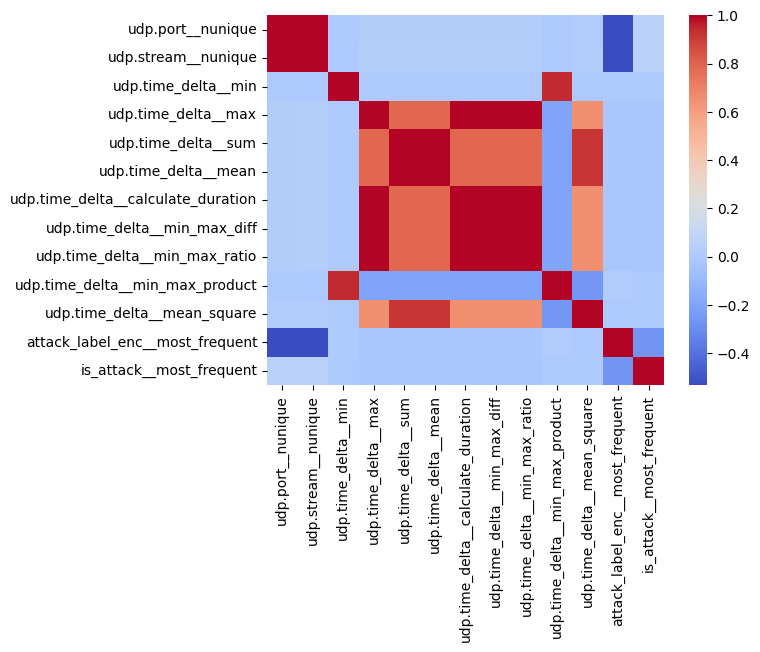

Processing module dns...


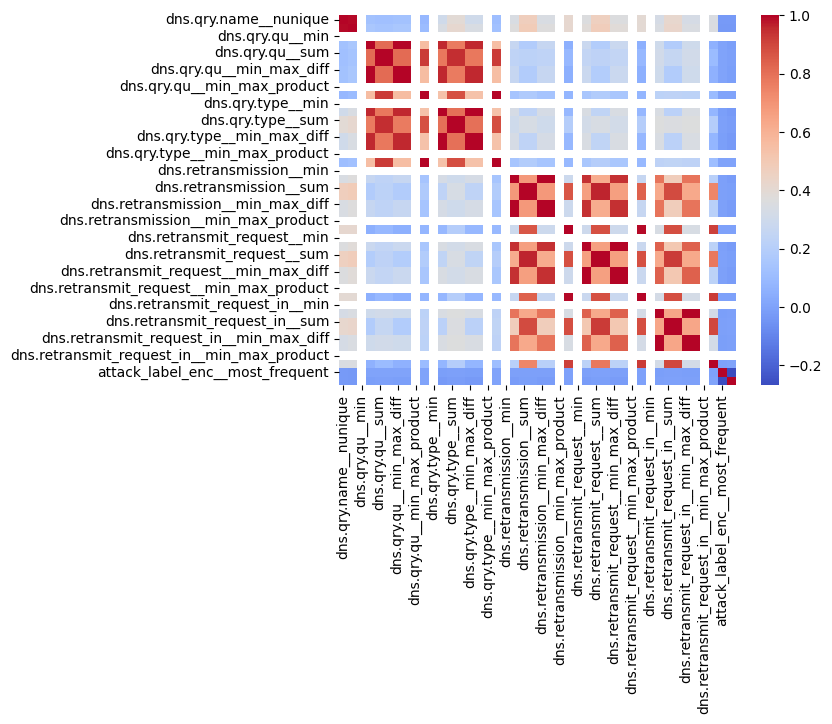

Processing module http...


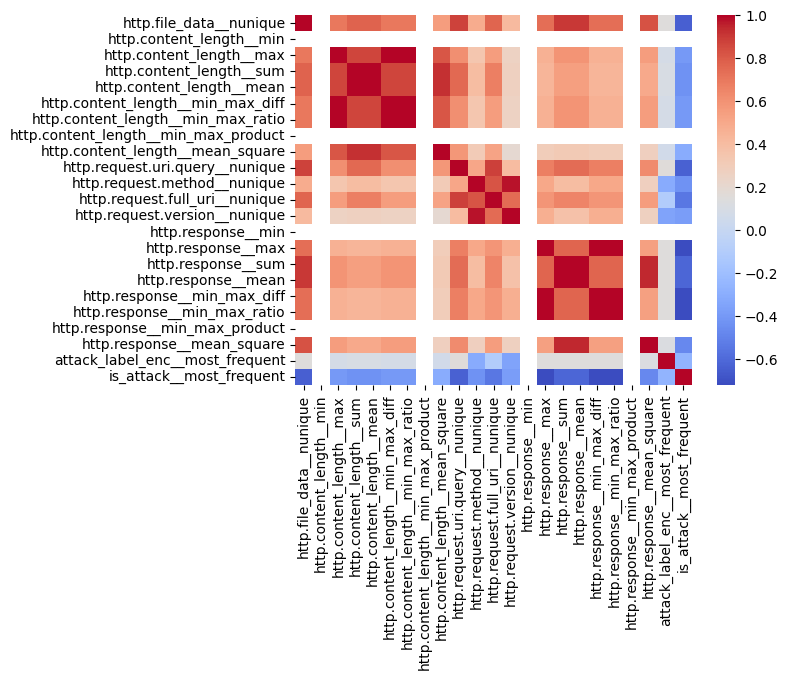

Processing module arp...


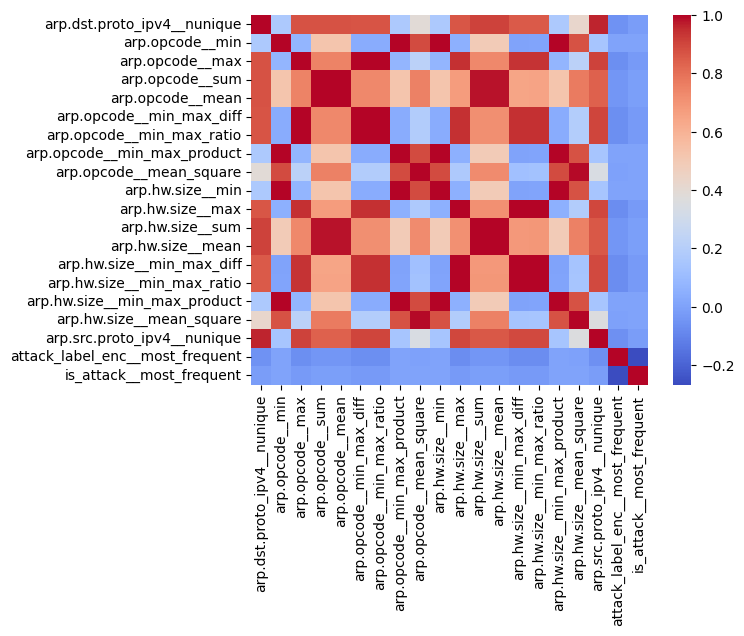

Processing module mqtt...


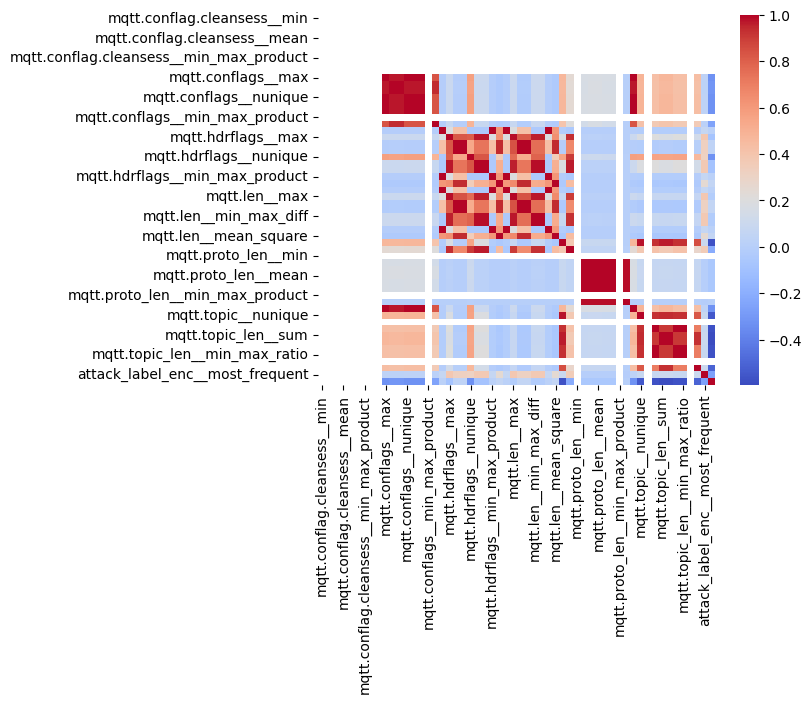

Processing module tcp...


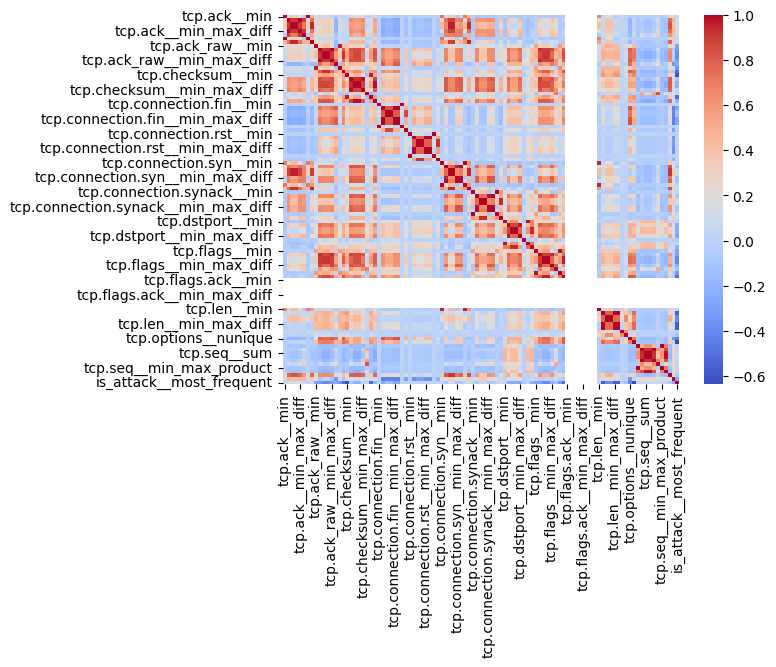

Processing module frame...


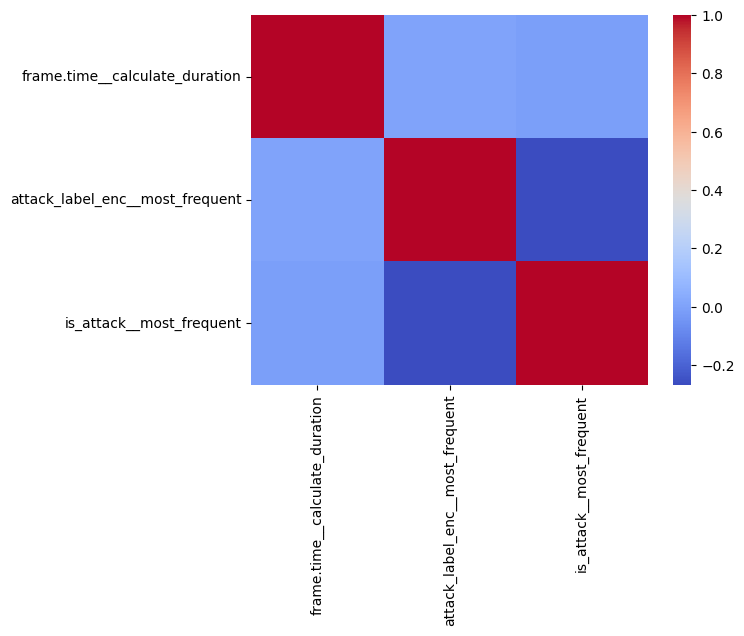

In [ ]:
for m in modules:
    print(f'Processing module {m}...')

    # get module's columns
    cols = filter_module(df_sample.columns, m) + targets_cols

    corr = df_sample[cols].drop(columns=['attack_label__most_frequent']).corr()
    sns.heatmap(corr, cmap="coolwarm")
    plt.show()